<a href="https://colab.research.google.com/github/pscabral/IFMA_Softex/blob/main/EficienteNetB3_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib import Path

# ML Imports
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation
from tensorflow.keras.layers.experimental.preprocessing import RandomZoom
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision
from tensorflow.keras.metrics import Recall

In [4]:
# Definindo uma semente para o TensorFlow a fim de manter os resultados consistentes
tf.random.set_seed(4)

In [5]:
# Caminho para os dados de treinamento
train_data = Path(r'/content/fruits_v2/train')
# Caminho para os dados de teste
train_data = Path(r'/content/fruits_v2/test')
# Caminho para os dados de validação
train_data = Path(r'/content/fruits_v2/val')

In [6]:
import os
from pathlib import Path

# Caminho para o diretório de dados de treinamento
train_data = Path('/content/fruits_v2/train')

# Lista de caminhos de arquivo de imagem de treinamento, convertidos em strings
training_images = [str(image) for image in train_data.glob('*/*')]

# Extrair apenas os nomes dos arquivos de imagem
image_names = [os.path.basename(image) for image in training_images]

# Exibir os primeiros nomes de imagem
print(image_names[925:936])

# Obter o número total de imagens
total_images = len(image_names)
print(total_images)

['Grape Blue_251.jpg', 'Grape Blue_882.jpg', 'Grape Blue_471.jpg', 'Grape Blue_557.jpg', 'Grape Blue_544.jpg', 'Grape Blue_113.jpg', 'Grape Blue_962.jpg', 'Grape Blue_687.jpg', 'Grape Blue_522.jpg', 'Grape Blue_12.jpg', 'Grape Blue_173.jpg']
11787


In [7]:
# Lista de caminhos para imagens de treinamento - Obtém todos os arquivos nos subdiretórios de train_data
training_images = list(train_data.glob('*/*'))

In [8]:
# Seleciona um intervalo de imagens de treinamento, do índice 925 ao 935 (incluindo o índice 925 e excluindo o índice 936).
training_images[925:936]

[PosixPath('/content/fruits_v2/train/Grape Blue/Grape Blue_251.jpg'),
 PosixPath('/content/fruits_v2/train/Grape Blue/Grape Blue_882.jpg'),
 PosixPath('/content/fruits_v2/train/Grape Blue/Grape Blue_471.jpg'),
 PosixPath('/content/fruits_v2/train/Grape Blue/Grape Blue_557.jpg'),
 PosixPath('/content/fruits_v2/train/Grape Blue/Grape Blue_544.jpg'),
 PosixPath('/content/fruits_v2/train/Grape Blue/Grape Blue_113.jpg'),
 PosixPath('/content/fruits_v2/train/Grape Blue/Grape Blue_962.jpg'),
 PosixPath('/content/fruits_v2/train/Grape Blue/Grape Blue_687.jpg'),
 PosixPath('/content/fruits_v2/train/Grape Blue/Grape Blue_522.jpg'),
 PosixPath('/content/fruits_v2/train/Grape Blue/Grape Blue_12.jpg'),
 PosixPath('/content/fruits_v2/train/Grape Blue/Grape Blue_173.jpg')]

In [9]:
# Converte a lista de caminhos para imagens de treinamento em uma lista de strings
training_images = list(map(lambda x: str(x), training_images))

In [10]:
# Seleciona um intervalo de imagens de treinamento, do índice 925 ao 935 (incluindo o índice 925 e excluindo o índice 936).
training_images[925:936]

['/content/fruits_v2/train/Grape Blue/Grape Blue_251.jpg',
 '/content/fruits_v2/train/Grape Blue/Grape Blue_882.jpg',
 '/content/fruits_v2/train/Grape Blue/Grape Blue_471.jpg',
 '/content/fruits_v2/train/Grape Blue/Grape Blue_557.jpg',
 '/content/fruits_v2/train/Grape Blue/Grape Blue_544.jpg',
 '/content/fruits_v2/train/Grape Blue/Grape Blue_113.jpg',
 '/content/fruits_v2/train/Grape Blue/Grape Blue_962.jpg',
 '/content/fruits_v2/train/Grape Blue/Grape Blue_687.jpg',
 '/content/fruits_v2/train/Grape Blue/Grape Blue_522.jpg',
 '/content/fruits_v2/train/Grape Blue/Grape Blue_12.jpg',
 '/content/fruits_v2/train/Grape Blue/Grape Blue_173.jpg']

In [11]:
# Obtém o comprimento (número de elementos) da lista de caminhos para imagens de treinamento
len(training_images)

11787

In [12]:
# Função para extrair o rótulo de um caminho de imagem
def labelExtraction(image_path):
    # Divida o caminho com base na barra '/'
    path_parts = image_path.split("/")
    # O rótulo estará na penúltima parte (índice -2)
    return path_parts[-2]

# Aplica a função labelExtraction a cada caminho de imagem na lista training_images
train_images_label = list(map(lambda x: labelExtraction(x), training_images))
# Seleciona um intervalo de rótulos de imagens de treinamento (índice 925 ao 935)
train_images_label[925:936]

['Grape Blue',
 'Grape Blue',
 'Grape Blue',
 'Grape Blue',
 'Grape Blue',
 'Grape Blue',
 'Grape Blue',
 'Grape Blue',
 'Grape Blue',
 'Grape Blue',
 'Grape Blue']

In [13]:
# Inicializa um objeto LabelEncoder para codificar rótulos categóricos em valores numéricos
encoder = LabelEncoder()

In [14]:
# Aplica o codificador LabelEncoder para transformar os rótulos de treinamento em valores numéricos
train_images_label = encoder.fit_transform(train_images_label)

In [15]:
# Seleciona um intervalo de rótulos de imagens de treinamento após a codificação
train_images_label[925:936]

array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12])

In [16]:
# A linha abaixo converte os rótulos das imagens de treinamento em formato one-hot encoding.
# Isso é útil em problemas de classificação, onde você tem várias classes e deseja representar
# cada classe como um vetor binário onde apenas um dos elementos é 1 e os outros são 0.
train_images_label = tf.keras.utils.to_categorical(train_images_label)

In [17]:
# A linha abaixo acessa uma fatia (slice) do array 'train_images_label', abrangendo os elementos do índice 925 ao 936.
train_images_label[925:936]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.

In [18]:
# Divisão entre dados de treinamento e dados de validação
# A linha abaixo utiliza a função 'train_test_split' para dividir os conjuntos de dados 'training_images'
# e 'train_images_label' em conjuntos de treinamento ('X_train' e 'y_train') e conjuntos de validação ('X_valid' e 'y_valid').
X_train, X_valid, y_train, y_valid = train_test_split(training_images, train_images_label)

In [19]:
# A linha abaixo acessa uma fatia (slice) do conjunto de dados de treinamento 'X_train',
# abrangendo os elementos do índice 18 ao 22.
X_train[18:23]

['/content/fruits_v2/train/Apricot/Apricot_488.jpg',
 '/content/fruits_v2/train/Lemon/Lemon_60.jpg',
 '/content/fruits_v2/train/Orange/Orange_289.jpg',
 '/content/fruits_v2/train/Peach/Peach_389.jpg',
 '/content/fruits_v2/train/Limes/Limes_405.jpg']

In [20]:
# A linha abaixo acessa uma fatia (slice) do conjunto de rótulos de treinamento 'y_train',
# abrangendo os elementos do índice 15 ao 17.
y_train[15:18]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]], dtype=float32)

In [21]:
import os
import tensorflow as tf

# Diretório raiz onde suas imagens estão localizadas
diretorio_raiz = "/content/fruits_v2/train"

# Tamanho desejado para as imagens redimensionadas
img_size = 224

# Crie um modelo de redimensionamento
resize = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Resizing(img_size, img_size)])

# Percorra todas as pastas e subpastas
for raiz, diretorios, arquivos in os.walk(diretorio_raiz):
    for arquivo in arquivos:
        # Verifique se o arquivo é uma imagem (você pode adicionar mais extensões, se necessário)
        if arquivo.endswith(".jpg") or arquivo.endswith(".png"):
            imagem_path = os.path.join(raiz, arquivo)
            # Carregue a imagem
            imagem = tf.keras.preprocessing.image.load_img(imagem_path)
            # Redimensione a imagem
            imagem_redimensionada = resize(imagem)
            # Salve a imagem redimensionada de volta no mesmo local
            tf.keras.preprocessing.image.save_img(imagem_path, imagem_redimensionada)

print("Todas as imagens foram redimensionadas com sucesso.")

Todas as imagens foram redimensionadas com sucesso.


In [22]:
# Criação de um objeto para aumentar o conjunto de dados (data augmentation)
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),             # Realiza um espelhamento horizontal aleatório das imagens.
    RandomRotation(0.2),                  # Aplica uma rotação aleatória de até 0.2 radianos nas imagens.
    RandomZoom(height_factor=(-0.3, -0.2)) # Aplica um zoom aleatório nas imagens, variando a altura dentro do intervalo (-0.3, -0.2).
])

In [23]:
# Hiperparâmetros
batch_size = 32  # Tamanho do lote (batch) utilizado durante o treinamento.
autotune = tf.data.experimental.AUTOTUNE  # Valor especial que permite ao TensorFlow otimizar o desempenho de operações de entrada de dados automaticamente.

In [24]:
# Carregar e Transformar Imagens
def loadTransform(image, label):
    image = tf.io.read_file(image)      # Lê o arquivo de imagem.
    image = tf.io.decode_jpeg(image, channels=3)  # Decodifica o arquivo de imagem no formato JPEG com 3 canais de cores.
    return image, label

In [25]:
# Preparar o conjunto de dados no formato TensorFlow
def prepareDataset(path, labels, train=True):

    # Preparar os dados
    image_paths = tf.convert_to_tensor(path)  # Converter os caminhos das imagens em um tensor TensorFlow.
    labels = tf.convert_to_tensor(labels)     # Converter os rótulos em um tensor TensorFlow.

    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)  # Criar um conjunto de dados a partir dos caminhos das imagens.
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)       # Criar um conjunto de dados a partir dos rótulos.

    dataset = tf.data.Dataset.zip((image_dataset, label_dataset))  # Combina os conjuntos de dados de imagens e rótulos.
    dataset = dataset.map(lambda image, label: loadTransform(image, label))  # Aplicar a função 'loadTransform' para carregar e transformar as imagens.
    dataset = dataset.map(lambda image, label: (resize(image), label), num_parallel_calls=autotune)  # Redimensionar as imagens.

    dataset = dataset.shuffle(1000)  # Embaralhar o conjunto de dados.
    dataset = dataset.batch(batch_size)  # Agrupar as imagens em lotes.

    # Se train == True, aplicar o aumento de dados nas imagens
    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label), num_parallel_calls=autotune)

    # Se train == False, repetir o conjunto de dados e retornar
    dataset = dataset.repeat()

    return dataset

In [26]:
# Conjunto de dados de treinamento
train_dataset = prepareDataset(X_train, y_train)

In [27]:
# Formato
image, label = next(iter(train_dataset))
print(image.shape)  # Imprime o formato (shape) das imagens no conjunto de dados.
print(label.shape)  # Imprime o formato (shape) dos rótulos no conjunto de dados.

(32, 224, 224, 3)
(32, 33)


Avocado


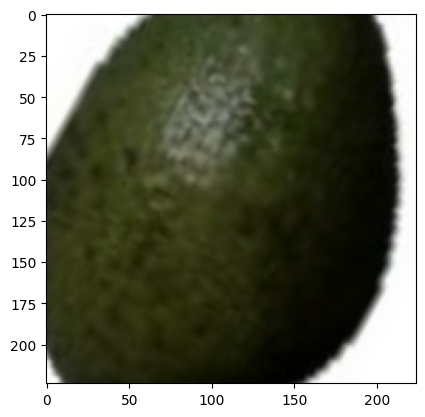

In [28]:
# Visualização de uma imagem e seu rótulo
print(encoder.inverse_transform(np.argmax(label, axis=1))[0])
plt.imshow((image[0].numpy() / 255).reshape(224, 224, 3))

In [29]:
# Cria o dataset de validação
valid_dataset = prepareDataset(X_valid, y_valid, train = False)

In [30]:
# Formato
image, label = next(iter(valid_dataset))
print(image.shape)  # Imprime o formato (shape) das imagens no conjunto de dados de validação.
print(label.shape)  # Imprime o formato (shape) dos rótulos no conjunto de dados de validação.

(32, 224, 224, 3)
(32, 33)


Apple Granny Smith


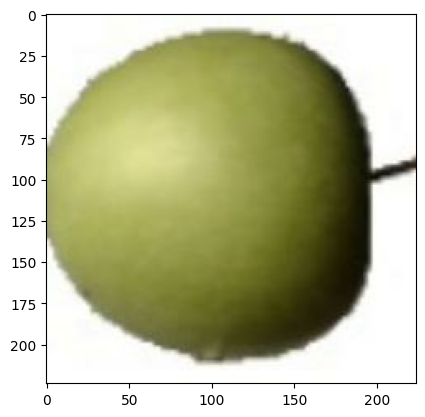

In [31]:
# Visualizando uma imagem e seu rótulo
print(encoder.inverse_transform(np.argmax(label, axis=1))[0])
plt.imshow((image[0].numpy() / 255).reshape(224, 224, 3))

In [32]:
# Utilizando o EfficientNetB3 para o modelo
pre_model = EfficientNetB3(input_shape=(224, 224, 3), include_top=False)

43941136/43941136 [==============================] - 0s 0us/step


In [40]:
# Adicionando algumas camadas ao pre_model
model = tf.keras.Sequential([
    pre_model,  # Utiliza o modelo base 'pre_model' (EfficientNetB3) como ponto de partida.
    tf.keras.layers.GlobalAveragePooling2D(),  # Adiciona uma camada de pooling global.
    tf.keras.layers.Dense(33, activation='softmax')  # Adiciona uma camada densa (fully connected) com 131 unidades e função de ativação softmax.
])

In [41]:
# Exibindo um resumo do modelo
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 7, 7, 1536)        10783535  
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1536)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 33)                50721     
                                                                 
Total params: 10834256 (41.33 MB)
Trainable params: 10746953 (41.00 MB)
Non-trainable params: 87303 (341.03 KB)
_________________________________________________________________


In [42]:
# Hiperparâmetros
lr = 0.001  # Taxa de aprendizado (learning rate) definida como 0.001.
beta1 = 0.9  # Valor do primeiro momento (beta1) utilizado em otimizadores como o Adam.
beta2 = 0.999  # Valor do segundo momento (beta2) utilizado em otimizadores como o Adam.
ep = 1e-07  # Epsilon (ep) é um valor pequeno adicionado ao denominador para evitar divisão por zero em otimizadores como o Adam.

In [43]:
# Obter uma GPU para executar o treinamento
device_name = tf.test.gpu_device_name()  # Verifica se há uma GPU disponível.
if "GPU" not in device_name:  # Se não encontrar "GPU" no nome do dispositivo, significa que não há GPU disponível.
    print("Dispositivo GPU não encontrado")
print('Encontrada GPU em: {}'.format(device_name))

Dispositivo GPU não encontrado
Encontrada GPU em: 


In [44]:
# Compilação do Modelo
model.compile(optimizer=Adam(learning_rate=lr,
                            beta_1=beta1,
                            beta_2=beta2,
                            epsilon=ep),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

In [45]:
# Exibindo um resumo do modelo
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 7, 7, 1536)        10783535  
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1536)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 33)                50721     
                                                                 
Total params: 10834256 (41.33 MB)
Trainable params: 10746953 (41.00 MB)
Non-trainable params: 87303 (341.03 KB)
_________________________________________________________________


In [46]:
# Executando o modelo
with tf.device('/device:GPU:0'):
    history = model.fit(train_dataset,
                        steps_per_epoch=len(X_train)//batch_size,
                        epochs=1,
                        validation_data=valid_dataset,
                        validation_steps=len(y_train)//batch_size)

276/276 [==============================] - 5773s 21s/step - loss: 0.2504 - accuracy: 0.9360 - precision: 0.9660 - recall: 0.9124 - val_loss: 0.5021 - val_accuracy: 0.8307 - val_precision: 0.8657 - val_recall: 0.7951


In [47]:
model.layers[0].trainable = True

In [49]:
#Saving Model
#Let model is our "trained model". So we run this code snippets to save our model:

# Load the library
from tensorflow.keras.models import load_model
# Save the model
model.save('/content/model.h5')

In [ ]:
#Load the Model in Future and Predicting from it
#In the future, whenever we need the model, we will load that like this:
# load model
m = load_model('/content/model.h5')
# predict
pred = m.predict(x)

In [63]:
# Importe a biblioteca pathlib para trabalhar com caminhos de arquivos
from pathlib import Path

# Especifique o diretório onde estão armazenadas as imagens de teste
test_data = Path("/content/fruits_v2/test")

# Lista todos os caminhos para as imagens de teste
test_image_paths = list(test_data.glob("*/*"))

# Convertemos os caminhos em strings para facilitar o processamento
test_images = list(map(lambda x: str(x), test_image_paths))

# Função para extrair o rótulo de um caminho de imagem
def labelExtraction(image_path):
    # Divida o caminho com base na barra '/'
    path_parts = image_path.split("/")
    # O rótulo estará na penúltima parte (índice -2)
    return path_parts[-2]

# Aplica a função labelExtraction a cada caminho de imagem na lista test_images
test_image_labels = list(map(lambda x: labelExtraction(x), test_images))

# Seleciona um intervalo de rótulos de imagens de teste (por exemplo, índice 925 ao 935)
test_image_labels[925:936]


['Pepper Red',
 'Pepper Red',
 'Pepper Red',
 'Pepper Red',
 'Pepper Red',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot',
 'Apricot']

In [65]:
test_image_labels = encoder.fit_transform(test_image_labels)
test_image_labels = tf.keras.utils.to_categorical(test_image_labels)

In [66]:
test_image_paths = tf.convert_to_tensor(test_images)
test_image_labels = tf.convert_to_tensor(test_image_labels)

In [67]:
# Função para decode das imagens
def imageDecoder(image, label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels = 3)
    image = tf.image.resize(image, [224,224], method = "bilinear")
    return image, label

In [68]:
# Cria o dataset de teste
test_dataset = (tf.data.Dataset
                 .from_tensor_slices((test_images, test_image_labels))
                 .map(imageDecoder)
                 .batch(batch_size))

In [69]:
image, label = next(iter(test_dataset))
print(image.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 33)


Clementine


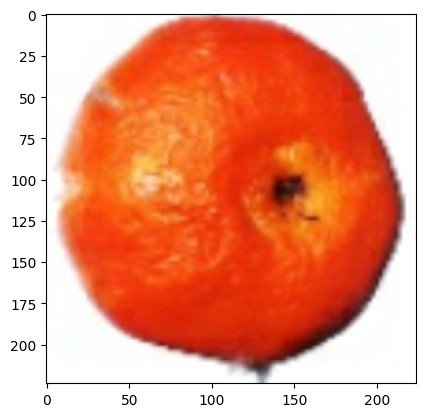

In [70]:
# Visualiza uma imagem de teste
print(encoder.inverse_transform(np.argmax(label, axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224,224,3))

In [71]:
loss, acc, prec, rec = model.evaluate(test_dataset)

54/54 [==============================] - 192s 4s/step - loss: 0.4742 - accuracy: 0.8423 - precision: 0.8654 - recall: 0.8030


In [72]:
print("Loss: ", loss)
print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)

Loss:  0.47419312596321106
Accuracy:  0.8423212170600891
Precision:  0.8654453754425049
Recall:  0.8030480742454529


In [73]:
# Função para carregar uma nova imagem
def loadNewImage(image_path):
    image = tf.io.read_file(image_path)
    image = tf.io.decode_jpeg(image, channels = 3)
    image = tf.image.resize(image, [224,224], method = "bilinear")
    plt.imshow(image.numpy()/255)
    image = tf.expand_dims(image, 0)
    return image

In [74]:
# Função para fazer previsões
def makePrediction(image_path, model, enc):
    image = loadNewImage(image_path)
    prediction = model.predict(image)
    pred = np.argmax(prediction, axis = 1)
    return enc.inverse_transform(pred)[0]

1/1 [==============================] - 7s 7s/step


'Apple Braeburn'

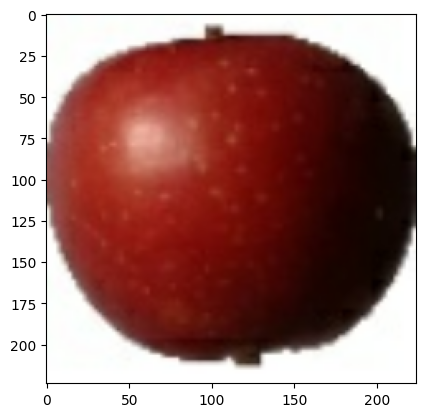

In [75]:
# Prediction 1
makePrediction("/content/fruits_v2/test/Apple Braeburn/Apple Braeburn_100.jpg",
               model, encoder)

1/1 [==============================] - 0s 212ms/step


'Banana'

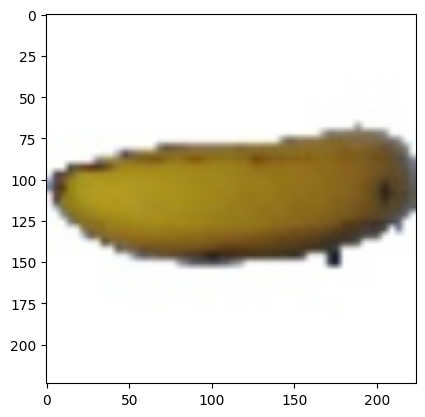

In [76]:
# Prediction 2
makePrediction("/content/fruits_v2/test/Banana/Banana_100.jpg",
               model, encoder)

1/1 [==============================] - 0s 242ms/step


'Blueberry'

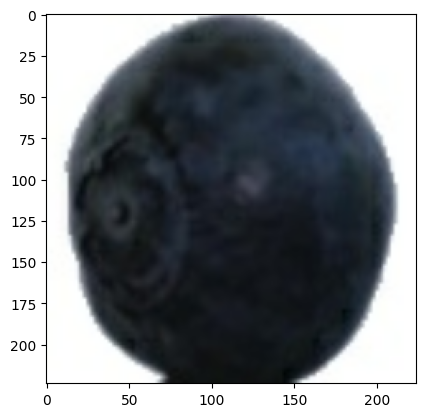

In [77]:
# Prediction 3
makePrediction("/content/fruits_v2/test/Blueberry/Blueberry_140.jpg",
               model, encoder)